aer_simulator_statevector


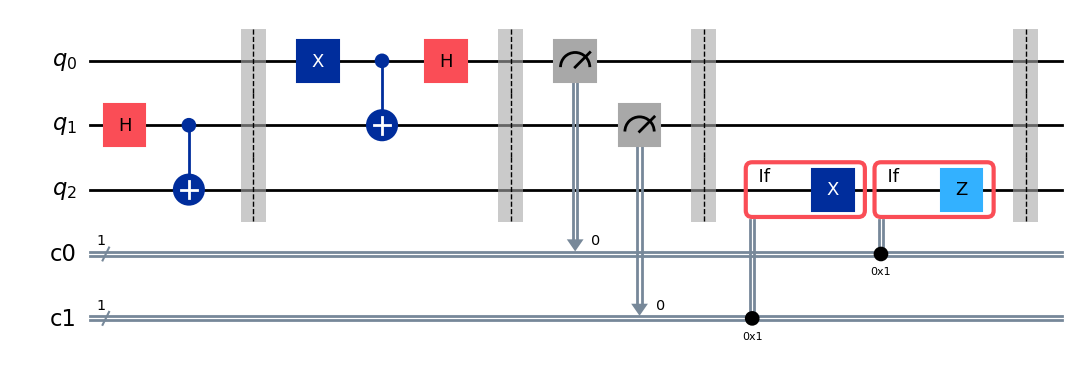

In [12]:
import numpy as np

from qiskit_aer import AerSimulator
from qiskit import QuantumCircuit, QuantumRegister,transpile, ClassicalRegister

from IPython.display import Math
from qc_workbook.show_state import statevector_expr
#########################################################################
#
#
def get_statevector_array(circuit):
    circuit = circuit.copy()
    circuit.save_statevector()
    circuit = transpile(circuit, backend=simulator)
    job = simulator.run(circuit)
    result = job.result()
    qiskit_statevector = result.data()['statevector']

    return np.asarray(qiskit_statevector)

#########################################################################
#
#
simulator = AerSimulator(method='statevector')
print(simulator.name)

qr = QuantumRegister(3, "q")
cr0 = ClassicalRegister(1, "c0")
cr1 = ClassicalRegister(1, "c1")
circuit = QuantumCircuit(qr, cr0, cr1)

#### Step1
circuit.h(1)
circuit.cx(1,2)
circuit.barrier()

#### Step2
circuit.x(0)

#### Step3
circuit.cx(0,1)
circuit.h(0)
circuit.barrier()

#### Step4
circuit.measure([0,1],[0,1])
circuit.barrier()

#### Step5
with circuit.if_test((cr1,1)):
    circuit.x(2)
    
with circuit.if_test((cr0,1)):
    circuit.z(2)
circuit.barrier()

circuit.draw('mpl')


In [16]:
compiled_circuit = transpile(circuit, simulator)

job = simulator.run(compiled_circuit, shots=1024) 
result = job.result()

print(result)

counts = result.get_counts(compiled_circuit)
print(counts)

#statevector = result.get_statevector(compiled_circuit)
#print([str(coef)+ label for (coef, label) in zip(statevector,state_label) ])

Result(backend_name='aer_simulator_statevector', backend_version='0.17.1', job_id='8853ac56-0334-463b-9ea3-d9a6247379ff', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x3': 272, '0x1': 263, '0x2': 236, '0x0': 253}), header={'creg_sizes': [['c0', 1], ['c1', 1]], 'global_phase': 0.0, 'memory_slots': 2, 'n_qubits': 3, 'name': 'circuit-244', 'qreg_sizes': [['q', 3]], 'metadata': {}}, status=DONE, seed_simulator=2812815218, metadata={'time_taken': 0.000829227, 'num_bind_params': 1, 'parallel_state_update': 2, 'parallel_shots': 1, 'required_memory_mb': 1, 'input_qubit_map': [[2, 2], [1, 1], [0, 0]], 'method': 'statevector', 'device': 'CPU', 'num_qubits': 3, 'sample_measure_time': 0.00020563, 'active_input_qubits': [0, 1, 2], 'num_clbits': 2, 'remapped_qubits': False, 'runtime_parameter_bind': False, 'max_memory_mb': 3911, 'noise': 'ideal', 'measure_sampling': True, 'batched_shots_optimization': False, 'fusion': {'applied':